## PREDICTING NBA SHOTS

In [1]:
# data modelling
import sklearn

# data processing
import numpy as np
import pandas as pd

# data visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt

# balancing data
from imblearn.over_sampling import RandomOverSampler
from collections import Counter


# turn off auto display chart
plt.ioff()

In [2]:
# reading CSV and creating dataframe
df = pd.read_csv('shot_logs.csv')

In [3]:
# drop MATCHUP COLUMN
df.drop('MATCHUP', axis='columns', inplace=True)

#### Adding dummy variables for string types

In [4]:
# replacing variables tutorial
# https://www.youtube.com/watch?v=6Ev7xmgVfKU

# shift column position tutorial
# https://www.geeksforgeeks.org/how-to-move-a-column-to-first-position-in-pandas-dataframe/#:~:text=The%20basic%20idea%20to%20move,to%20manipulate%20with%20our%20dataframe.


# CHANGE FOR LOCATION ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# duplicate column
df['LOCATION_DUM'] = df.loc[:, 'LOCATION']
# replace values in column
df['LOCATION_DUM'].replace({'A': 0, 'H': 1}, inplace=True)
# shift column
holder = df.pop('LOCATION_DUM')
df.insert(df.columns.get_loc('LOCATION') + 1, 'LOCATION_DUM', holder)

# CHANGE FOR W ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# duplicate column
df['W_DUM'] = df.loc[:, 'W']
# replace values in column
df['W_DUM'].replace({'L': 0, 'W': 1}, inplace=True)
# shift column
holder = df.pop('W_DUM')
df.insert(df.columns.get_loc('W') + 1, 'W_DUM', holder)

# CHANGE FOR SHOT_RESULT ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# duplicate column
df['SHOT_RES_DUM'] = df.loc[:, 'SHOT_RESULT']
# replace values in column
df['SHOT_RES_DUM'].replace({'missed': 0, 'made': 1}, inplace=True)
# shift column
holder = df.pop('SHOT_RES_DUM')
df.insert(df.columns.get_loc('SHOT_RESULT') + 1, 'SHOT_RES_DUM', holder)

# df.head()

#### Changing size of numeric array for optimisation

In [5]:
# FINAL MARGIN
df['FINAL_MARGIN'] = pd.to_numeric(df['FINAL_MARGIN'], downcast='integer')
# SHOT NUMBER
df['SHOT_NUMBER'] = pd.to_numeric(df['SHOT_NUMBER'], downcast='integer')
# PERIOD
df['PERIOD'] = pd.to_numeric(df['PERIOD'], downcast='integer')
# SHOT CLOCK (FLOAT)
df['SHOT_CLOCK'] = pd.to_numeric(df['SHOT_CLOCK'], downcast='float')
# NUMBER OF DRIBBLES
df['DRIBBLES'] = pd.to_numeric(df['DRIBBLES'], downcast='integer')
# SHOT NUMBER
df['SHOT_NUMBER'] = pd.to_numeric(df['SHOT_NUMBER'], downcast='integer')
# TOUCH TIME (FLOAT)
df['TOUCH_TIME'] = pd.to_numeric(df['TOUCH_TIME'], downcast='float')
# SHOT DISTANCE (FLOAT)
df['SHOT_NUMBER'] = pd.to_numeric(df['SHOT_NUMBER'], downcast='float')
# POINTS TYPE
df['PTS_TYPE'] = pd.to_numeric(df['PTS_TYPE'], downcast='integer')
# CLOSEST DEFENDER DISTANCE (FLOAT)
df['CLOSE_DEF_DIST'] = pd.to_numeric(df['CLOSE_DEF_DIST'], downcast='float')
# FGM
df['FGM'] = pd.to_numeric(df['FGM'], downcast='integer')
# POINTS
df['PTS'] = pd.to_numeric(df['PTS'], downcast='integer')

# DUMMY VARS
df['LOCATION_DUM'] = pd.to_numeric(df['LOCATION_DUM'], downcast='integer')
df['W_DUM'] = pd.to_numeric(df['W_DUM'], downcast='integer')
df['SHOT_RES_DUM'] = pd.to_numeric(df['SHOT_RES_DUM'], downcast='integer')

In [ ]:
# display headers and some data
df.info()

In [ ]:
# show first few data
df.head()

## Plotting charts

#### Plot dribbles before shot

In [ ]:
# plot dribbles
dribbles_data = df.loc[:,"DRIBBLES"]
plt.hist(dribbles_data, bins = 15, edgecolor="black")

# add labels
plt.xlabel("Number of dribbles")
plt.ylabel("Instances")
plt.title("Number of dribbles before shot")

# save plot
plt.savefig("dribbles.png")

# show plot
plt.show()


#### Plot touch time before shot

In [ ]:
# delete row if touch time less than 0
df.drop(df[df['TOUCH_TIME'] < 0].index, inplace = True)

# droped 312 rows

In [ ]:
# plot touch time
touch_time_data = df.loc[:,"TOUCH_TIME"]
plt.hist(touch_time_data, bins = 30, edgecolor="black")

# add labels
plt.xlabel("Touch time")
plt.ylabel("Instances")
plt.title("Touch time before shot")

# save plot
plt.savefig("time_before_shot.png")

# show plot
plt.show()

#### Plot shot distance

In [ ]:
# plot shot distance
shot_dist_data = df.loc[:,"SHOT_DIST"]
plt.hist(shot_dist_data, bins = 15, edgecolor="black")

# add labels
plt.xlabel("Shot distance")
plt.ylabel("Instances")
plt.title("Shot distance")

# save plot
plt.savefig("shot_distance.png")

# show plot
plt.show()

#### Points type

In [ ]:
# plot shot distance
pts_type_data = df.loc[:,"PTS_TYPE"]
pts_type_data2 = [0, 0]
for pt in pts_type_data:
  if pt == 2:
    pts_type_data2[0] += 1
  if pt == 3:
    pts_type_data2[1] += 1


plt.bar(['2','3'], pts_type_data2, edgecolor="black")

# add labels
plt.xlabel("Point type")
plt.ylabel("Instances")
plt.title("2 or 3 point shots")

# save plot
plt.savefig("pts_type.png")

# show plot
plt.show()

#### Closest defender distance

In [ ]:
# plot closest defender distance
def_dist = df.loc[:,"CLOSE_DEF_DIST"]
plt.hist(def_dist, bins = 15, edgecolor="black")

# add labels
plt.xlabel("Distance")
plt.ylabel("Instances")
plt.title("Closest defender distance")

# save plot
plt.savefig("close_def_dist.png")

# show plot
plt.show()

#### Shot result

In [ ]:
# shot result (bar)
shot_result_data = df.loc[:,"SHOT_RESULT"]
shot_result_data2 = [0, 0]
for shot in shot_result_data:
  if shot == 'made':
    shot_result_data2[0] += 1
  if shot == 'missed':
    shot_result_data2[1] += 1


plt.bar(['made','missed'], shot_result_data2, edgecolor="black")

# add labels
plt.xlabel("made or miss")
plt.ylabel("Instances")
plt.title("Shot result")

# save plot
plt.savefig("shot_result.png")

# show plot
plt.show()

In [ ]:
# shot result (pie)
shot_result_data = df.loc[:,"SHOT_RESULT"]
slices = [0, 0]
for shot in shot_result_data:
  if shot == 'made':
    slices[0] += 1
  if shot == 'missed':
    slices[1] += 1

labels = ['made', 'missed']
colors = ['#008fd7', '#fc4f32']
plt.pie(slices, labels=labels, colors=colors, wedgeprops={'edgecolor':'black'}, startangle=90, autopct='%1.1f%%')

# add labels
plt.title("Shot result")

# save plot
plt.savefig("shot_result_pie.png")

# show plot
plt.show()

## Balancing data

In [ ]:
# count number of made and missed shots
# print(sorted(Counter(df['SHOT_RESULT']).items()))

In [6]:
# create a copy of the data frame (X). Y will be a copy of all the shot results
X = df.copy()
Y = df['SHOT_RES_DUM']

In [7]:
# Do oversampling and print
ros = RandomOverSampler(random_state=0)
# resample and df2 is now with balanced values
# Y_resampled is just column with made/misses
df2, Y_resampled = ros.fit_resample(X, Y)
# count how many 
#print(f" {sorted(Counter(Y_resampled).items())} \nInstances: {len(Y_resampled)}")

In [ ]:
# check new dataframe shape (instances, columns)
df2.shape

## Splitting into training and testing data sets

#### Split into 3 (training, validation, testing) for each, split into features and labels

In [8]:
# create a copy of resampled data and class labels
X2 = df2.copy()
Y2 = Y_resampled.copy()

In [9]:
# Dropping columns

# drop 'FGM', 'SHOT_RESULT' & 'SHOT_RES_DUM' from  (REQUIRED)
X2.drop(['FGM', 'SHOT_RESULT', 'SHOT_RES_DUM'], axis='columns', inplace=True)

# dropping other columns
X2.drop(['GAME_ID', 'LOCATION', 'W', 'W_DUM', 'GAME_CLOCK', 'SHOT_CLOCK', 'CLOSEST_DEFENDER', 'player_name', 'PTS', 'FINAL_MARGIN'], axis='columns', inplace=True)
X2.drop(['player_id', 'CLOSEST_DEFENDER_PLAYER_ID'], axis='columns', inplace=True)

In [14]:
# import split library
from sklearn.model_selection import train_test_split

# split into main(train + validation) = 85%, test = 15%
main_features, test_features, main_labels, test_labels = train_test_split(X2, Y2, test_size = 0.15) # random_state = 0

# split into train = 85%, + validation = 15%
train_features, val_features, train_labels, val_labels = train_test_split(main_features, main_labels, test_size = 0.15) # random_state = 0

# print test
# print(f"train features: {train_features.shape}\ntrain labels: {train_labels.shape}\nval features: {val_features.shape}\ntest features: {test_features.shape}\ntest labels: {test_labels.shape}")

Split into training, validation, testing

In [18]:
# import split library
from sklearn.model_selection import train_test_split

# split into main(train + validation) = 85%, test = 15%
main, test = train_test_split(df2, test_size = 0.15)

# split into train = 85%, + validation = 15%
train, val = train_test_split(main, test_size = 0.15) # random_state = 0

### Exporting training, validation, testing data sets

In [19]:
# EXPORT TRAIN, VAL, TEST

#df2.to_csv(r'C:\Users\loh_h\Desktop\School\all_data(balanced).csv', index=False)

#train.to_csv(r'C:\Users\loh_h\Desktop\School\train.csv', index=False)
#val.to_csv(r'C:\Users\loh_h\Desktop\School\val.csv', index=False)
#test.to_csv(r'C:\Users\loh_h\Desktop\School\test.csv', index=False)

### TRAINING DATA

### Random forest tutorials

In [ ]:
# create RandomForest obj
from sklearn.ensemble import RandomForestClassifier

# instantiate model 
# DOCS - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
rf_model = RandomForestClassifier(n_estimators = 100, class_weight = None, criterion = 'gini',
                                 # max_depth = , min_samples = , min_samples_leaf = , max_leaf_nodes = , min_impurity_decrease = ,
                                 bootstrap = True,  max_features = "sqrt",  oob_score = False
                                 #random_state=0
                                )

In [ ]:
# training model
rf_model.fit(train_features, train_labels)

##### Initial model test with validation data

In [ ]:
predictions = rf_model.predict(val_features)

from sklearn import metrics
print(f"Accuracy = {metrics.accuracy_score(val_labels, predictions)}")

Testing with different n_estimators

In [ ]:
n_estimators = [10, 20, 50, 100, 200, 500]
train_results = []
test_results = []

for estimator in n_estimators:
  # rf_model
  

### Feature Importance (Random Forest)

https://mljar.com/blog/feature-importance-in-random-forest/

In [ ]:
# Get feature importance (sorted)
sorted_idx = rf_model.feature_importances_.argsort()
plt.barh(train_features.columns[sorted_idx], rf_model.feature_importances_[sorted_idx])

plt.ylabel("Features")
plt.xlabel("Mean decrease in impurity")
plt.title("Feature importance")

plt.show()

#### Evaluation (Random Forest)

              precision    recall  f1-score   support

           0       0.64      0.67      0.66      6323
           1       0.65      0.62      0.63      6269

    accuracy                           0.65     12592
   macro avg       0.65      0.64      0.64     12592
weighted avg       0.65      0.65      0.64     12592



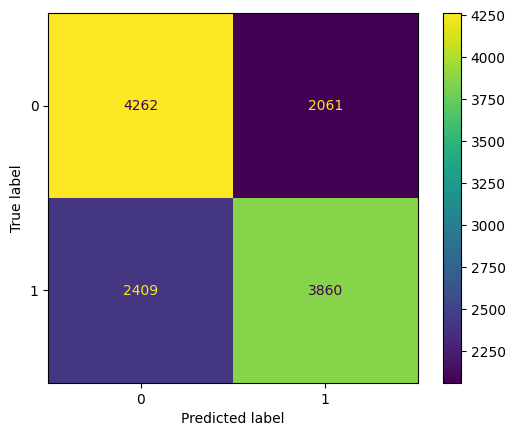

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot the confusion matrix in graph
cm = confusion_matrix(val_labels,predictions, labels=rf_model.classes_)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot()


from sklearn.metrics import classification_report
print(classification_report(val_labels, predictions))

XGBOOST IMPLEMENTATION

youtube vid
https://www.youtube.com/watch?v=rMeq9khzdvM

In [ ]:
import xgboost

In [ ]:
# INSTANTIATE MODEL WITH PARAMETERS
xgboost_model = xgboost.XGBClassifier(
                          learning_rate=0.1,
                          n_estimators = 5000,
                          subsample=0.5,
                          colsample_bytree = 0.5,
                          eval_metric = 'auc',
                          verbosity=1)


# Model parameters
# learning rate -- the weightage of every tree in the classifier
# max depth -- max depth of each tree in the xgb model
# n_estimators -- the maximum number of trees the model will create
# subsample -- the % of data in the sample that will get randomly selected for creating an individual tree in the observation (helps prevent overfitting) 
# colsample_bytree -- specifies % of total number of features to use 
# eval_metric = 'auc'

# SPECIFYING EVALUATION DATA SET
eval_set = [(val_features, val_labels)]


# TRAIN MODEL
xgboost_model.fit(train_features, train_labels,
                  early_stopping_rounds = 10,
                  eval_set = eval_set,
                  verbose = True)


# Model training parameters
# early stopping rounds -- the input x. Says that if the model performance on the validation data set does not change for 10 iterations, no new tree will be built 


In [ ]:
# make prediction using xgboost
predictions = xgboost_model.predict(val_features)

from sklearn import metrics
print(f"Accuracy = {metrics.accuracy_score(val_labels, predictions)}")

### Feature importance

In [ ]:
from xgboost import plot_importance

plot_importance(xgboost_model)

ADABOOST IMPLEMENTATION

youtube vid
https://www.youtube.com/watch?v=rMeq9khzdvM

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# INSTANTIATE MODEL WITH PARAMETERS
adaboost_model = AdaBoostClassifier(n_estimators = 100,
                                    learning_rate = 1)

#n_estimators -- number of weak learners to train iteratively
# learning_rate -- contributes to the weights of weak learners

In [ ]:
# train adaboost classifer
adaboost_model.fit(train_features, train_labels)

In [ ]:
# Make prediction

# make prediction using xgboost
predictions = adaboost_model.predict(val_features)

from sklearn import metrics
print(f"Accuracy = {metrics.accuracy_score(val_labels, predictions)}")